[Back to Lecture Overview](Overview.ipynb)

# Pandas for real-world data

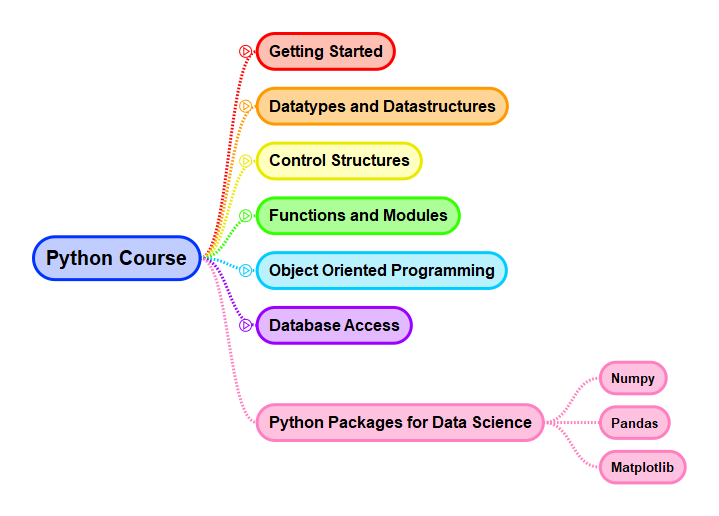

In [2]:
from IPython.display import Image
Image(filename="../../Pics/DS_Python_Libs_All.PNG")

In the previous notebook Numpy arrays have been introduced. Numpy arrays provide an efficient data structure for clean, numerical data. However, in practise the quality of data is often more challenging. There can be missing data and lots of different data types. Moreover, accessing data only by integer indices may be cumbersome. More meaningful indices would be desirable.
**Pandas** is a newer python package, which builds on top of numpy arrays and extends it with many features, which provide a much more efficient managing of practical data. Pandas provides

* methods to cope with missing data and different data types, 
* methods to label columns and rows for a comfortable data access
* functions, which are familiar to users of database- and spreadsheet frameworks, such as complex queries, filters, joins, pivots, ...
* methods for comfortable data visualisation (on top of Matplotlib)

The fundamental data structures of Pandas are _Series_ and _Dataframes_. Both of them apply a third important structure, the _Index_. The basics of these datastructures are introduced in this notebook. 

Import Pandas and check version:

In [3]:
import pandas as pd
print(pd.__version__)

0.22.0


## Basics of Pandas Series
Pandas Series can be considered to be 1-dimensional numpy arrays with an explicitly configurable index.
### Construction of Pandas Series

In [4]:
S1=pd.Series(data=[10,20,30,40])
print("Pandas Series object:    \n",S1)
print("Values of series object: ",S1.values)
print("Type of series values:   ",type(S1.values))
print("Index of series object:  ",S1.index)
print("Type of series index:    ",type(S1.index))

Pandas Series object:    
 0    10
1    20
2    30
3    40
dtype: int64
Values of series object:  [10 20 30 40]
Type of series values:    <class 'numpy.ndarray'>
Index of series object:   RangeIndex(start=0, stop=4, step=1)
Type of series index:     <class 'pandas.core.indexes.range.RangeIndex'>


In [5]:
pd.Series()
S2=pd.Series(index=["2014","2015","2016","2017"],data=[19.5,20.3,18.7,17.0])
print("Pandas Series object:    \n",S2)
print("Values of series object: ",S2.values)
print("Type of series values:   ",type(S2.values))
print("Index of series object:  ",S2.index)
print("Type of series index:    ",type(S2.index))

Pandas Series object:    
 2014    19.5
2015    20.3
2016    18.7
2017    17.0
dtype: float64
Values of series object:  [19.5 20.3 18.7 17. ]
Type of series values:    <class 'numpy.ndarray'>
Index of series object:   Index(['2014', '2015', '2016', '2017'], dtype='object')
Type of series index:     <class 'pandas.core.indexes.base.Index'>


Pandas series can be directly generated from Python dictionaries:

In [6]:
RegisteredUsersDict={"June":14789,"July":15511,"August":15517,"September":16012}
print(RegisteredUsersDict)

{'June': 14789, 'July': 15511, 'August': 15517, 'September': 16012}


In [7]:
RegisteredUsersSeries=pd.Series(RegisteredUsersDict)
print(RegisteredUsersSeries)

August       15517
July         15511
June         14789
September    16012
dtype: int64


### Accessing Pandas Series data
Accessing single elements:

In [8]:
print(S1[1])
print(S2["2015"])

20
20.3


A data structure with an explicitly defined index is already available in Python: the _dictionary_. However, pandas series provide more capabilities, e.g. for the query of slices over a key-range, such as 

In [9]:
print("Slice of S1:\n",S1[1:3]) 
print("\nSlice of S2:\n",S2["2015":"2017"])

Slice of S1:
 1    20
2    30
dtype: int64

Slice of S2:
 2015    20.3
2016    18.7
2017    17.0
dtype: float64


Even though the index has been defined explicitly, it is always possible to access by integer indices

In [10]:
print(S2[1:3])

2015    20.3
2016    18.7
dtype: float64


The possibilty to access elements by the explicitly defined index and the implicit integer index may yield confusions, in particular if the explicitly defined index also contains integers. Therefore it is recommended to access elements by `.loc[]` and `.iloc[].` The former provides access by explicitly defined index and the latter by the implicit integer index:

In [11]:
S2.loc["2015":"2017"]

2015    20.3
2016    18.7
2017    17.0
dtype: float64

In [12]:
S2.iloc[1:3]

2015    20.3
2016    18.7
dtype: float64

Masked access:

In [17]:
print(S2[(S2<20) & (S2>18)])

2014    19.5
2016    18.7
dtype: float64


Add new element to series

In [18]:
print("Before: \n",S2)
S2["2018"]=17.7
print("\nAfter: \n",S2)

Before: 
 2014    19.5
2015    20.3
2016    18.7
2017    17.0
dtype: float64

After: 
 2014    19.5
2015    20.3
2016    18.7
2017    17.0
2018    17.7
dtype: float64


## Basics of Pandas Dataframes

Pandas dataframes can be considered to be 2-dimensional numpy array with an explicitly configurable index.

### Construction of Pandas Dataframes
Create dataframe from nested Python list:

In [19]:
DF1=pd.DataFrame(data=[[1,2,3],[4,5,6]])
print("Pandas dataframe object:    \n",DF1)
print("\nValues of dataframe object: \n",DF1.values)
print("\nType of dataframe values:   ",type(DF1.values))
print("Index of dataframe object:  ",DF1.index)
print("Type of dataframe index:    ",type(DF1.index))
print("Columns of dataframe object:",DF1.columns)

Pandas dataframe object:    
    0  1  2
0  1  2  3
1  4  5  6

Values of dataframe object: 
 [[1 2 3]
 [4 5 6]]

Type of dataframe values:    <class 'numpy.ndarray'>
Index of dataframe object:   RangeIndex(start=0, stop=2, step=1)
Type of dataframe index:     <class 'pandas.core.indexes.range.RangeIndex'>
Columns of dataframe object: RangeIndex(start=0, stop=3, step=1)


Create dataframe with explicitly defined index and labeled column names:

In [20]:
DF2=pd.DataFrame(index=["peter","paul","mary"],columns=["gender","age"],
                 data=[["male",23],["male",31],["female",25]])
print("Pandas dataframe object:    \n",DF2)
print("\nValues of dataframe object: \n",DF2.values)
print("\nType of dataframe values:   ",type(DF2.values))
print("Index of dataframe object:  ",DF2.index)
print("Type of dataframe index:    ",type(DF2.index))
print("Columns of dataframe object:",DF2.columns)

Pandas dataframe object:    
        gender  age
peter    male   23
paul     male   31
mary   female   25

Values of dataframe object: 
 [['male' 23]
 ['male' 31]
 ['female' 25]]

Type of dataframe values:    <class 'numpy.ndarray'>
Index of dataframe object:   Index(['peter', 'paul', 'mary'], dtype='object')
Type of dataframe index:     <class 'pandas.core.indexes.base.Index'>
Columns of dataframe object: Index(['gender', 'age'], dtype='object')


Create dataframe from Numpy array:

In [21]:
import numpy as np
arr= np.random.randint(0,10,(3,7))
DF3=pd.DataFrame(arr)
print("Pandas dataframe object:    \n",DF3)
print("\nValues of dataframe object: \n",DF3.values)
print("\nType of dataframe values:   ",type(DF3.values))
print("Index of dataframe object:  ",DF3.index)
print("Type of dataframe index:    ",type(DF3.index))
print("Columns of dataframe object:",DF3.columns)

Pandas dataframe object:    
    0  1  2  3  4  5  6
0  2  3  6  4  6  3  3
1  4  6  1  0  7  0  3
2  5  4  4  5  3  5  5

Values of dataframe object: 
 [[2 3 6 4 6 3 3]
 [4 6 1 0 7 0 3]
 [5 4 4 5 3 5 5]]

Type of dataframe values:    <class 'numpy.ndarray'>
Index of dataframe object:   RangeIndex(start=0, stop=3, step=1)
Type of dataframe index:     <class 'pandas.core.indexes.range.RangeIndex'>
Columns of dataframe object: RangeIndex(start=0, stop=7, step=1)


Rename index and columns of dataframe:

In [22]:
DF3.columns=["A","B","C","D","E","F","G"]
DF3.index= ["user1","user2","user3"]
print(DF3)

       A  B  C  D  E  F  G
user1  2  3  6  4  6  3  3
user2  4  6  1  0  7  0  3
user3  5  4  4  5  3  5  5


Insert new column into existing dataframe

In [23]:
hometown=['new york','san diego','Boston']
DF2["home"]=hometown
print(DF2)

       gender  age       home
peter    male   23   new york
paul     male   31  san diego
mary   female   25     Boston


In the previous section the Pandas series _RegisteredUsersSeries_ has been defined. From such a series object dataframes can be constructed as follows:

In [24]:
RegisteredUsersDF=pd.DataFrame(RegisteredUsersSeries,columns=["Users"])
print(RegisteredUsersDF)

           Users
August     15517
July       15511
June       14789
September  16012


Create dataframe from list of dictionaries. Note that even though not all dictionaries have the same keys the dataframe can be built.

In [25]:
personDict=[{"name":"ben","age":13},{"name":"lucia","age":15},{"name":"lynn","age":11},{"name":"eve"}]
print(personDict)

[{'name': 'ben', 'age': 13}, {'name': 'lucia', 'age': 15}, {'name': 'lynn', 'age': 11}, {'name': 'eve'}]


In [26]:
personDF=pd.DataFrame(personDict)
print(personDF)

    age   name
0  13.0    ben
1  15.0  lucia
2  11.0   lynn
3   NaN    eve


### Accessing Pandas Dataframe data

A single column of a dataframe can be accessed by specifying the name of the column such as e.g.:

In [27]:
print(DF2["home"])

peter     new york
paul     san diego
mary        Boston
Name: home, dtype: object


or alternatively:

In [28]:
print(DF2.home)

peter     new york
paul     san diego
mary        Boston
Name: home, dtype: object


However, __a single row can not be accessed in this way__:

In [29]:
# DF2["peter"] or DF2[0] raises an error

A possibility to access a single row would be

In [30]:
print(DF2["peter":"peter"])

      gender  age      home
peter   male   23  new york


In [31]:
print(DF2[0:1])

      gender  age      home
peter   male   23  new york


As already mentioned in the context of Pandas Series objects, this type of indexing is confusing and it is recommended to apply `.loc[]` and `.iloc[]` instead.

Access of single row:

In [32]:
print(DF2.loc["peter"])

gender        male
age             23
home      new york
Name: peter, dtype: object


or:

In [33]:
print(DF2.iloc[0])

gender        male
age             23
home      new york
Name: peter, dtype: object


Access element in dedicated row and column:

In [34]:
print(DF2.loc["peter","home"])

new york


or:

In [35]:
print(DF2.iloc[0,2])

new york


Access dedicated subframe of the dataframe

In [36]:
print(DF2.loc[["peter","mary"],["age","home"]])

       age      home
peter   23  new york
mary    25    Boston


or:

In [37]:
print(DF2.iloc[[0,2],[1,2]])

       age      home
peter   23  new york
mary    25    Boston


## Time Ranges in Pandas
Data is often associated to date- and time-stamps. In particular time-series data consists of a series of uni- or multi-variate data instances, where each instance is labeled with an unique date-time-stamp. In Pandas date-time ranges can be created by the `date_range()` method as shown below. The first parameter defines the start of the date-time range, the _periods_-parameter defines the number of instances and the `freq`-parameter defines the duration between successive date-time-stamps.

Date-time range with a frequency of 2-days:

In [42]:
dates1 = pd.date_range('20161003', periods=6,freq="2D")
print(dates1)

DatetimeIndex(['2016-10-03', '2016-10-05', '2016-10-07', '2016-10-09',
               '2016-10-11', '2016-10-13'],
              dtype='datetime64[ns]', freq='2D')


Date-time range with a frequency of 45 minutes:

In [43]:
dates2 = pd.date_range('20161003104500', periods=4,freq="45Min")
print(dates2)

DatetimeIndex(['2016-10-03 10:45:00', '2016-10-03 11:30:00',
               '2016-10-03 12:15:00', '2016-10-03 13:00:00'],
              dtype='datetime64[ns]', freq='45T')


The elements of a date-time range are `timestamps`. Single `timestamps`-objects can be created as follows:

In [44]:
dec23=pd.Timestamp(pd.datetime(2016,12,23,9,15,0))
jan9=pd.Timestamp(pd.datetime(2017,1,9,10,30,0))
print(dec23)
print(jan9)

2016-12-23 09:15:00
2017-01-09 10:30:00


Operations like adding a time-delta to a given timestamp or calculating the number of days can be performed like e.g.:

In [47]:
print(type(dates1[1]))
print(dates1[1]+10)
datediff1=dates1[4]-dates1[1]
print(datediff1)
datediff2=jan9-dec23
print(datediff2)
print(datediff1 + datediff2)

<class 'pandas._libs.tslib.Timestamp'>
2016-10-25 00:00:00
6 days 00:00:00
17 days 01:15:00
23 days 01:15:00


In Pandas date-time-ranges are often applied as index for series or dataframes:

In [48]:
TS1=pd.Series(index=dates1,data=np.arange(10,16))
print(TS1)

2016-10-03    10
2016-10-05    11
2016-10-07    12
2016-10-09    13
2016-10-11    14
2016-10-13    15
Freq: 2D, dtype: int32


In [49]:
dates2 = pd.date_range('20160929', periods=5,freq="2D")
TS2=pd.Series(index=dates2,data=np.arange(5))
print(TS2)

2016-09-29    0
2016-10-01    1
2016-10-03    2
2016-10-05    3
2016-10-07    4
Freq: 2D, dtype: int32


In [50]:
dates3 = pd.date_range('20161003', periods=5,freq="10H30MIN")
TDF1=pd.DataFrame(index=dates3,data=np.random.randint(100,200,(5,3)),columns=["C1","C2","C3"])
print(TDF1)

                      C1   C2   C3
2016-10-03 00:00:00  109  110  199
2016-10-03 10:30:00  106  197  113
2016-10-03 21:00:00  166  112  175
2016-10-04 07:30:00  196  161  168
2016-10-04 18:00:00  144  146  152


In [51]:
dates4 = pd.date_range('20161003110000', periods=10,freq="10S")
TDF2=pd.DataFrame(index=dates4,data=np.random.randint(100,200,(10,3)),columns=["C3","C4","C5"])
print(TDF2)

                      C3   C4   C5
2016-10-03 11:00:00  188  160  122
2016-10-03 11:00:10  123  147  199
2016-10-03 11:00:20  164  110  178
2016-10-03 11:00:30  123  126  104
2016-10-03 11:00:40  153  170  109
2016-10-03 11:00:50  174  113  134
2016-10-03 11:01:00  102  139  172
2016-10-03 11:01:10  168  108  131
2016-10-03 11:01:20  121  154  164
2016-10-03 11:01:30  112  180  178


## Combining Series and Dataframes
Series and dataframes can be combined by the methods `combine()` and `combine_first()`. Application of `combine_first()` is demonstrated below. If 2 series `S1`, and `S2` are combined by `S1.combine_first(S2)` the result is a new Series-object whose index is the union of the index elements in `S1` and `S2`. For each element in the new index the corresponding value is
* the value of `S1` at this index-element, if `S1` contains this index-element.
* the value of `S2` at this index-element, if `S1` does not contain this index-element

If two dataframes `DF1`, and `DF2` are combined by `DF1.combine_first(DF2)` the result is a new Dataframe-object whose index is the union of the index elements in `DF1` and `DF2` and whose columns are the union of the columns in `DF1` and `DF2`. For each element in the resulting dataframe the value is
* the value of `DF1` at this index/column-element, if `DF1` contains this index/column-element.
* the value of `DF2` at this index/column-element, if `DF1` does not contain this index/column-element, but `DF2` contains it
* `NAN` if neither `DF1` nor `DF2` contains this index/column-element.

In [54]:
print("\nTime Series TS1=\n",TS1)
print("\nTime Series TS2=\n",TS2)
TS3=TS1.combine_first(TS2)
print("\nCombination of TS1 and TS2 is TS3=\n",TS3)
print("-"*30)
print("\nDataframe TDF1=\n",TDF1)
print("\nDataframe TDF2=\n",TDF2)
TSDF1=TDF2.combine_first(TDF1)
print("\nCombination of TDF1 and TDF2 is TSDF1=\n",TSDF1)


Time Series TS1=
 2016-10-03    10
2016-10-05    11
2016-10-07    12
2016-10-09    13
2016-10-11    14
2016-10-13    15
Freq: 2D, dtype: int32

Time Series TS2=
 2016-09-29    0
2016-10-01    1
2016-10-03    2
2016-10-05    3
2016-10-07    4
Freq: 2D, dtype: int32

Combination of TS1 and TS2 is TS3=
 2016-09-29     0.0
2016-10-01     1.0
2016-10-03    10.0
2016-10-05    11.0
2016-10-07    12.0
2016-10-09    13.0
2016-10-11    14.0
2016-10-13    15.0
Freq: 2D, dtype: float64
------------------------------

Dataframe TDF1=
                       C1   C2   C3
2016-10-03 00:00:00  109  110  199
2016-10-03 10:30:00  106  197  113
2016-10-03 21:00:00  166  112  175
2016-10-04 07:30:00  196  161  168
2016-10-04 18:00:00  144  146  152

Dataframe TDF2=
                       C3   C4   C5
2016-10-03 11:00:00  188  160  122
2016-10-03 11:00:10  123  147  199
2016-10-03 11:00:20  164  110  178
2016-10-03 11:00:30  123  126  104
2016-10-03 11:00:40  153  170  109
2016-10-03 11:00:50  174  113  13

## Handling of Missing Data
One of the main features of `Pandas` is it's capability to manage missing data. As shown in the example above, Series- and Dataframe-elements without assigned data are represented by `NaN`, which is actually Numpy's `numpy.nan` value. A boolean mask, which identifies all dataframe-elements with missing data (NaN-values) can be calculated as follows. It contains `True` at all `NaN`-positions.

In [55]:
print(TSDF1.isnull())

                        C1     C2     C3     C4     C5
2016-10-03 00:00:00  False  False  False   True   True
2016-10-03 10:30:00  False  False  False   True   True
2016-10-03 11:00:00   True   True  False  False  False
2016-10-03 11:00:10   True   True  False  False  False
2016-10-03 11:00:20   True   True  False  False  False
2016-10-03 11:00:30   True   True  False  False  False
2016-10-03 11:00:40   True   True  False  False  False
2016-10-03 11:00:50   True   True  False  False  False
2016-10-03 11:01:00   True   True  False  False  False
2016-10-03 11:01:10   True   True  False  False  False
2016-10-03 11:01:20   True   True  False  False  False
2016-10-03 11:01:30   True   True  False  False  False
2016-10-03 21:00:00  False  False  False   True   True
2016-10-04 07:30:00  False  False  False   True   True
2016-10-04 18:00:00  False  False  False   True   True


In combination with `all()` and `any()` the `isnull()`-method can also be applied to check whether all columns or all rows or any column or any row contain missing data.

In [56]:
print("Are all elements in a column of TSDF1 NaN?\n",TSDF1.isnull().all(axis=0))
print("\nIs any element in a column of TSDF1 NaN?\n",TSDF1.isnull().any(axis=0))
print("\nAre all elements in a row of TSDF1 NaN?\n",TSDF1.isnull().all(axis=1))
print("\nIs any element in a row of TSDF1 NaN?\n",TSDF1.isnull().any(axis=1))

Are all elements in a column of TSDF1 NaN?
 C1    False
C2    False
C3    False
C4    False
C5    False
dtype: bool

Is any element in a column of TSDF1 NaN?
 C1     True
C2     True
C3    False
C4     True
C5     True
dtype: bool

Are all elements in a row of TSDF1 NaN?
 2016-10-03 00:00:00    False
2016-10-03 10:30:00    False
2016-10-03 11:00:00    False
2016-10-03 11:00:10    False
2016-10-03 11:00:20    False
2016-10-03 11:00:30    False
2016-10-03 11:00:40    False
2016-10-03 11:00:50    False
2016-10-03 11:01:00    False
2016-10-03 11:01:10    False
2016-10-03 11:01:20    False
2016-10-03 11:01:30    False
2016-10-03 21:00:00    False
2016-10-04 07:30:00    False
2016-10-04 18:00:00    False
dtype: bool

Is any element in a row of TSDF1 NaN?
 2016-10-03 00:00:00    True
2016-10-03 10:30:00    True
2016-10-03 11:00:00    True
2016-10-03 11:00:10    True
2016-10-03 11:00:20    True
2016-10-03 11:00:30    True
2016-10-03 11:00:40    True
2016-10-03 11:00:50    True
2016-10-03 11:01

The `dropna()`-method can be applied to drop all columns or rows, in which at least one or in which all elements are NaN. The following use of `dropna()` drops all columns, which contain at least one `NaN`.

In [57]:
TSDF2=TSDF1.copy()
print(TSDF2.dropna(axis=1,how="any"))

                        C3
2016-10-03 00:00:00  199.0
2016-10-03 10:30:00  113.0
2016-10-03 11:00:00  188.0
2016-10-03 11:00:10  123.0
2016-10-03 11:00:20  164.0
2016-10-03 11:00:30  123.0
2016-10-03 11:00:40  153.0
2016-10-03 11:00:50  174.0
2016-10-03 11:01:00  102.0
2016-10-03 11:01:10  168.0
2016-10-03 11:01:20  121.0
2016-10-03 11:01:30  112.0
2016-10-03 21:00:00  175.0
2016-10-04 07:30:00  168.0
2016-10-04 18:00:00  152.0


`NaN`-values can be replaced by any other value using the `fillna()` method:

In [58]:
TSDF3=TSDF1.fillna(value=0.0)
print(TSDF3)

                        C1     C2     C3     C4     C5
2016-10-03 00:00:00  109.0  110.0  199.0    0.0    0.0
2016-10-03 10:30:00  106.0  197.0  113.0    0.0    0.0
2016-10-03 11:00:00    0.0    0.0  188.0  160.0  122.0
2016-10-03 11:00:10    0.0    0.0  123.0  147.0  199.0
2016-10-03 11:00:20    0.0    0.0  164.0  110.0  178.0
2016-10-03 11:00:30    0.0    0.0  123.0  126.0  104.0
2016-10-03 11:00:40    0.0    0.0  153.0  170.0  109.0
2016-10-03 11:00:50    0.0    0.0  174.0  113.0  134.0
2016-10-03 11:01:00    0.0    0.0  102.0  139.0  172.0
2016-10-03 11:01:10    0.0    0.0  168.0  108.0  131.0
2016-10-03 11:01:20    0.0    0.0  121.0  154.0  164.0
2016-10-03 11:01:30    0.0    0.0  112.0  180.0  178.0
2016-10-03 21:00:00  166.0  112.0  175.0    0.0    0.0
2016-10-04 07:30:00  196.0  161.0  168.0    0.0    0.0
2016-10-04 18:00:00  144.0  146.0  152.0    0.0    0.0


## Split, Concatenate and Join
Pandas dataframes can be splitted into parts using the common slicing approach as shown below.

In [60]:
parts=[TSDF3[:2],TSDF3[2:12],TSDF3[12:]]
for i,p in enumerate(parts):
    print("\nPart %1d\n"%i,p)


Part 0
                         C1     C2     C3   C4   C5
2016-10-03 00:00:00  109.0  110.0  199.0  0.0  0.0
2016-10-03 10:30:00  106.0  197.0  113.0  0.0  0.0

Part 1
                       C1   C2     C3     C4     C5
2016-10-03 11:00:00  0.0  0.0  188.0  160.0  122.0
2016-10-03 11:00:10  0.0  0.0  123.0  147.0  199.0
2016-10-03 11:00:20  0.0  0.0  164.0  110.0  178.0
2016-10-03 11:00:30  0.0  0.0  123.0  126.0  104.0
2016-10-03 11:00:40  0.0  0.0  153.0  170.0  109.0
2016-10-03 11:00:50  0.0  0.0  174.0  113.0  134.0
2016-10-03 11:01:00  0.0  0.0  102.0  139.0  172.0
2016-10-03 11:01:10  0.0  0.0  168.0  108.0  131.0
2016-10-03 11:01:20  0.0  0.0  121.0  154.0  164.0
2016-10-03 11:01:30  0.0  0.0  112.0  180.0  178.0

Part 2
                         C1     C2     C3   C4   C5
2016-10-03 21:00:00  166.0  112.0  175.0  0.0  0.0
2016-10-04 07:30:00  196.0  161.0  168.0  0.0  0.0
2016-10-04 18:00:00  144.0  146.0  152.0  0.0  0.0


Several dataframes can be concatenated. For this the parts must be assigned to a python list, which is passed to the Pandas method `concat()`. Vertical concatenation is realised by setting the parameter `axis=0`. For horizontal concatenation this parameter must be `1`. 

In [61]:
All=pd.concat(parts,axis=0)
print(All)

                        C1     C2     C3     C4     C5
2016-10-03 00:00:00  109.0  110.0  199.0    0.0    0.0
2016-10-03 10:30:00  106.0  197.0  113.0    0.0    0.0
2016-10-03 11:00:00    0.0    0.0  188.0  160.0  122.0
2016-10-03 11:00:10    0.0    0.0  123.0  147.0  199.0
2016-10-03 11:00:20    0.0    0.0  164.0  110.0  178.0
2016-10-03 11:00:30    0.0    0.0  123.0  126.0  104.0
2016-10-03 11:00:40    0.0    0.0  153.0  170.0  109.0
2016-10-03 11:00:50    0.0    0.0  174.0  113.0  134.0
2016-10-03 11:01:00    0.0    0.0  102.0  139.0  172.0
2016-10-03 11:01:10    0.0    0.0  168.0  108.0  131.0
2016-10-03 11:01:20    0.0    0.0  121.0  154.0  164.0
2016-10-03 11:01:30    0.0    0.0  112.0  180.0  178.0
2016-10-03 21:00:00  166.0  112.0  175.0    0.0    0.0
2016-10-04 07:30:00  196.0  161.0  168.0    0.0    0.0
2016-10-04 18:00:00  144.0  146.0  152.0    0.0    0.0


SQL-stile joins can be performed on pandas dataframes by applying the `merge()`-method. The `on`-parameter of the `merge()`-method takes a list, whose elements are the keys on which the join shall be performed. The keys must be column names, which exist in both dataframes. The _how_-parameter of the `merge()`-method is used to specify the type of join. The type of join defines how to create the new dataframe in the case that some key-combinations do not exist in both dataframes:
* `inner`: The joined dataframe contains only rows, whose key-combinations exist in both dataframes
* `outer`: The joined dataframe contains all rows, whose key-combinations exist either in the left, the right or in both dataframes
* `left`: The joined dataframe contains all rows, whose key-combinations exist in the left dataframe
* `right`: The joined dataframe contains all rows, whose key-combinations exist in the right dataframe

Examples of all join-types are demonstrated below.

In [64]:
group1=pd.DataFrame({"firstname":["peter","paul","mary"],"familyname":["aman","bman","cman"],"age":[21,18,23],"gender":["m","m","f"]})
print(group1)
group2=pd.DataFrame({"firstname":["peter","paul","mary"],"familyname":["aman","bman","dman"],"home":["new york","boston","florida"],"phone":[1234,4789,9856]})
print(group2)
group3=pd.DataFrame({"firstname":["peter","paul","mary","mary"],"familyname":["aman","bman","dman","dman"],"home":["new york","boston","florida","ohio"],"phone":[1234,4789,9856,3498]})
print(group3)

   age familyname firstname gender
0   21       aman     peter      m
1   18       bman      paul      m
2   23       cman      mary      f
  familyname firstname      home  phone
0       aman     peter  new york   1234
1       bman      paul    boston   4789
2       dman      mary   florida   9856
  familyname firstname      home  phone
0       aman     peter  new york   1234
1       bman      paul    boston   4789
2       dman      mary   florida   9856
3       dman      mary      ohio   3498


In [69]:
groupInner12=pd.merge(group1, group2, on=['firstname','familyname'],how="inner")
print(groupInner12)
groupInner23=pd.merge(group2, group3, on=['firstname','familyname'],how="inner")
print(groupInner23)

   age familyname firstname gender      home  phone
0   21       aman     peter      m  new york   1234
1   18       bman      paul      m    boston   4789
  familyname firstname    home_x  phone_x    home_y  phone_y
0       aman     peter  new york     1234  new york     1234
1       bman      paul    boston     4789    boston     4789
2       dman      mary   florida     9856   florida     9856
3       dman      mary   florida     9856      ohio     3498


In [70]:
groupOuter=pd.merge(group1, group2, on=['firstname','familyname'],how="outer")
print(groupOuter)

    age familyname firstname gender      home   phone
0  21.0       aman     peter      m  new york  1234.0
1  18.0       bman      paul      m    boston  4789.0
2  23.0       cman      mary      f       NaN     NaN
3   NaN       dman      mary    NaN   florida  9856.0


In [71]:
groupLeft=pd.merge(group1, group2, on=['firstname','familyname'],how="left")
print(groupLeft)

   age familyname firstname gender      home   phone
0   21       aman     peter      m  new york  1234.0
1   18       bman      paul      m    boston  4789.0
2   23       cman      mary      f       NaN     NaN


In [72]:
groupRight=pd.merge(group1, group2, on=['firstname','familyname'],how="right")
print(groupRight)

    age familyname firstname gender      home  phone
0  21.0       aman     peter      m  new york   1234
1  18.0       bman      paul      m    boston   4789
2   NaN       dman      mary    NaN   florida   9856


## Simple Operations on Pandas Series and Dataframes

### Python operations

In [73]:
print(DF1)
DF2=3*DF1
print(DF2)
print(DF1.add(DF2))

   0  1  2
0  1  2  3
1  4  5  6
    0   1   2
0   3   6   9
1  12  15  18
    0   1   2
0   4   8  12
1  16  20  24


### Numpy operations on Pandas Series and Dataframes 

In [74]:
print(S1)

0    10
1    20
2    30
3    40
dtype: int64


In [75]:
print(DF1)

   0  1  2
0  1  2  3
1  4  5  6


In [76]:
print("-"*40)
print("\nlog2 of series values:\n",np.log2(S1))
print("\nlog2 of dataframe values:\n",np.log2(DF1))

print("-"*40)
print("\nSinus of series values:\n",np.sin(S1))
print("\nSinus of dataframe values:\n",np.sin(DF1))

print("-"*40)
print("\nSecond power of series values:\n",np.power(S1,2))
print("\nSecond power of dataframe values:\n",np.power(DF1,2))

----------------------------------------

log2 of series values:
 0    3.321928
1    4.321928
2    4.906891
3    5.321928
dtype: float64

log2 of dataframe values:
      0         1         2
0  0.0  1.000000  1.584963
1  2.0  2.321928  2.584963
----------------------------------------

Sinus of series values:
 0   -0.544021
1    0.912945
2   -0.988032
3    0.745113
dtype: float64

Sinus of dataframe values:
           0         1         2
0  0.841471  0.909297  0.141120
1 -0.756802 -0.958924 -0.279415
----------------------------------------

Second power of series values:
 0     100
1     400
2     900
3    1600
dtype: int64

Second power of dataframe values:
     0   1   2
0   1   4   9
1  16  25  36


In [78]:
print("Which series value are in the specified range:\n",TS2.between(3,8))
print("\nMaximum value in series:\n",TS2.max())
print("\nIndex of maximum value\n",TS2.idxmax())

Which series value are in the specified range:
 2016-09-29    False
2016-10-01    False
2016-10-03    False
2016-10-05     True
2016-10-07     True
Freq: 2D, dtype: bool

Maximum value in series:
 4

Index of maximum value
 2016-10-07 00:00:00


## Read from and Write to Files

### CSV File IO

In [79]:
print(groupRight)

    age familyname firstname gender      home  phone
0  21.0       aman     peter      m  new york   1234
1  18.0       bman      paul      m    boston   4789
2   NaN       dman      mary    NaN   florida   9856


In [80]:
groupRight.to_csv("groupRight.csv",sep=",",encoding="utf-8")

In [81]:
newgroupRight=pd.read_csv("groupRight.csv",sep=",",encoding="utf-8",index_col=0)

In [82]:
print(newgroupRight)

    age familyname firstname gender      home  phone
0  21.0       aman     peter      m  new york   1234
1  18.0       bman      paul      m    boston   4789
2   NaN       dman      mary    NaN   florida   9856


### Excel File IO

In [84]:
groupRight.to_excel("groupRight.xlsx")

In [86]:
newgroupRight=pd.read_excel("groupRight.xlsx",index_col=0)
print(newgroupRight)

    age familyname firstname gender      home  phone
0  21.0       aman     peter      m  new york   1234
1  18.0       bman      paul      m    boston   4789
2   NaN       dman      mary    NaN   florida   9856


In [87]:
groupRight.to_json('groupRight.json',orient='columns')

In [88]:
newgroupRight=pd.read_json("groupRight.json")
print(newgroupRight)

    age familyname firstname gender      home  phone
0  21.0       aman     peter      m  new york   1234
1  18.0       bman      paul      m    boston   4789
2   NaN       dman      mary   None   florida   9856
